In [157]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")


In [158]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [159]:
rmses_df = pd.read_csv('/drive/My Drive/Stock_Forecasting/Modeling/model_rmses.csv')
rois_df = pd.read_csv('/drive/My Drive/Stock_Forecasting/Modeling/rois.csv')

In [160]:
rmses_df = rmses_df.drop('Unnamed: 0', axis=1)
rois_df = rois_df.drop('Unnamed: 0', axis=1)

In [161]:
rmses_df

,Model,NASDX_RMSEs,IVV_RMSEs,VFIAX_RMSEs,VTSAX_RMSEs,QQQ_RMSEs,SWPPX_RMSEs,SWTSX_RMSEs,FXAIX_RMSEs,VUG_RMSEs,DIA_RMSEs,SPY_RMSEs,VOO_RMSEs,VTWO_RMSEs
0,Baseline,1.588590,21.442564,19.797750,5.585475,17.215619,3.267562,3.917987,7.390902,14.170785,19.163181,21.318424,19.661195,12.377123
1,ARIMA,2.292706,36.026600,33.119191,7.658805,22.830807,5.890846,5.779298,12.634809,21.115098,20.143136,35.735622,32.937877,73.850636
2,LSTM,0.432891,4.124593,4.080433,1.077314,5.309794,0.691213,0.820236,1.460773,3.685428,2.945879,4.413672,3.852907,5.435744
3,FBprophet,5.670109,32.488233,31.884724,10.883668,63.844688,5.617840,7.457487,11.723050,41.450437,24.605617,35.484111,31.302444,102.428854


In [162]:
rois_df

,NASDX_ROI,IVV_ROI,VFIAX_ROI,VTSAX_ROI,QQQ_ROI,SWPPX_ROI,SWTSX_ROI,FXAIX_ROI,VUG_ROI,DIA_ROI,SPY_ROI,VOO_ROI,VTWO_ROI
0,0.267214,0.33298,0.400738,0.421071,0.318488,0.368498,0.508993,0.385973,0.293362,0.185695,0.424128,0.356532,4.694433


### Visualizing Modeling Results

In [163]:
rmses_df_copy = rmses_df.copy().set_index('Model')

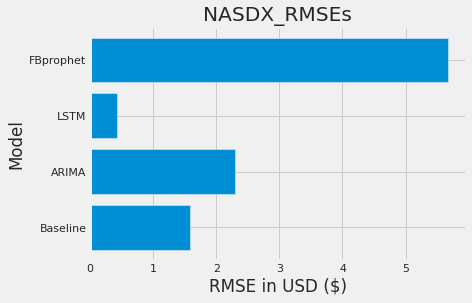

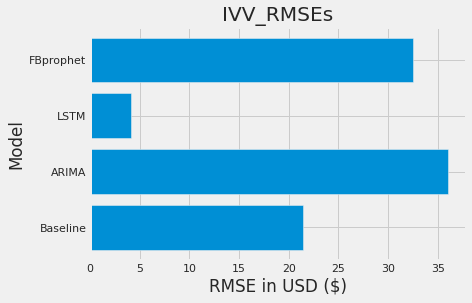

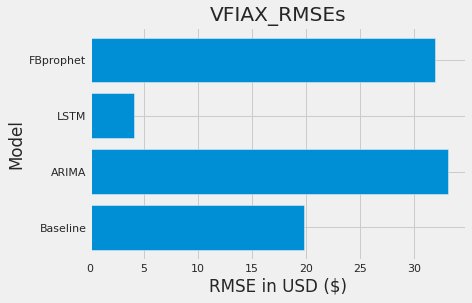

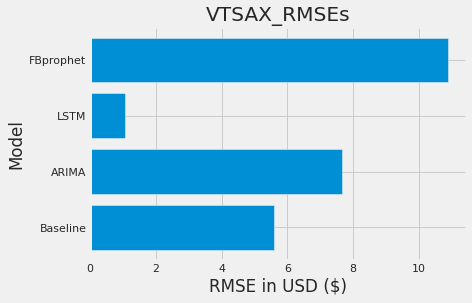

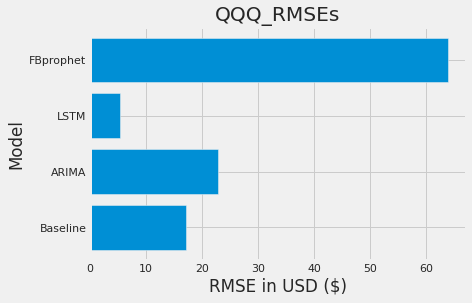

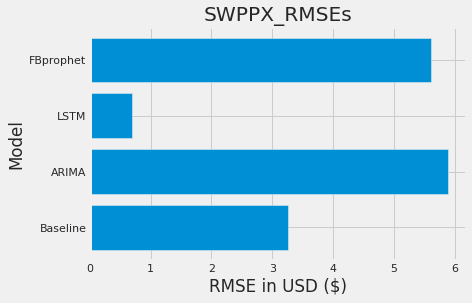

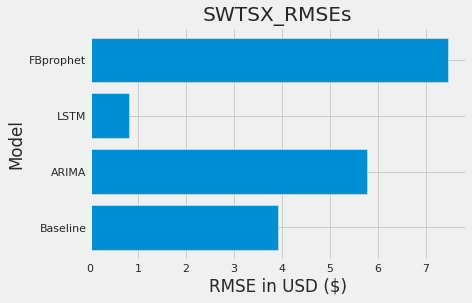

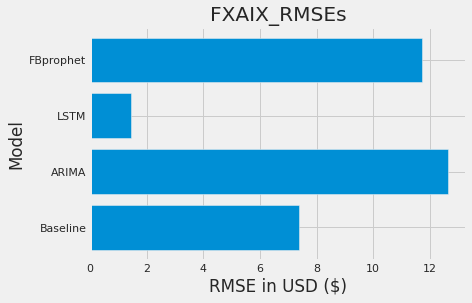

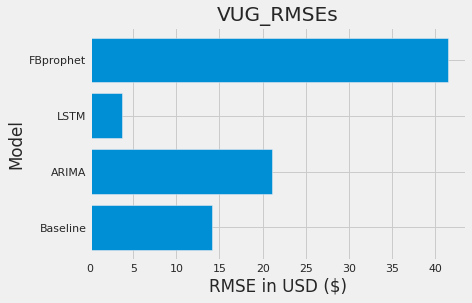

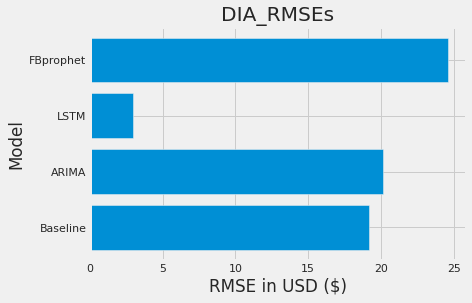

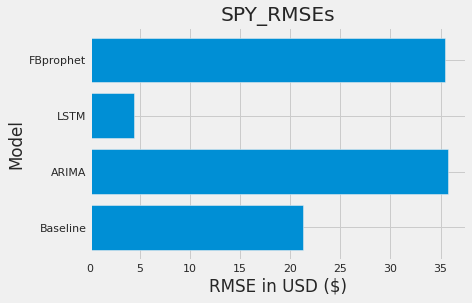

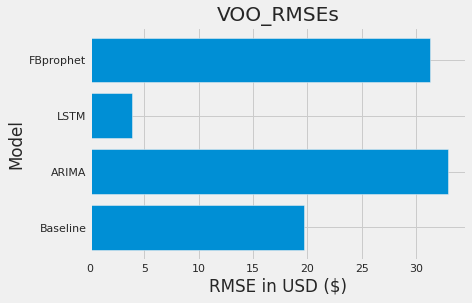

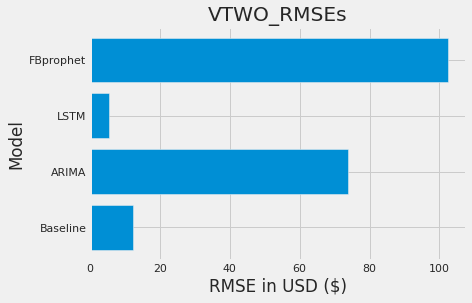

In [164]:
for col in rmses_df_copy.columns:
    plt.barh(rmses_df_copy.index,rmses_df_copy[col])
    plt.title(col)
    plt.xlabel('RMSE in USD ($)')
    plt.ylabel('Model')
    plt.show()

For all funds, the LSTM model was the best performing model that yielded the lowest RMSE. This means that the LSTM model will provide us with the most accurate predictions of close prices.

### Visualizing LSTM Models RMSEs

In [165]:
lstm_rmses = rmses_df.iloc[2,1:]
lstm_rmses_sorted = lstm_rmses.sort_values()
lstm_rmses_sorted

NASDX_RMSEs    0.432891
SWPPX_RMSEs    0.691213
SWTSX_RMSEs    0.820236
VTSAX_RMSEs     1.07731
FXAIX_RMSEs     1.46077
DIA_RMSEs       2.94588
VUG_RMSEs       3.68543
VOO_RMSEs       3.85291
VFIAX_RMSEs     4.08043
IVV_RMSEs       4.12459
SPY_RMSEs       4.41367
QQQ_RMSEs       5.30979
VTWO_RMSEs      5.43574
Name: 2, dtype: object

In [166]:
lstm_rmses_sorted.index = ['NASDX','IVV','VFIAX','VTSAX','QQQ','SWPPX','SWTSX','FXAIX','VUG','DIA','SPY','VOO','VTWO']

In [167]:
lstm_rmses_sorted

NASDX    0.432891
IVV      0.691213
VFIAX    0.820236
VTSAX     1.07731
QQQ       1.46077
SWPPX     2.94588
SWTSX     3.68543
FXAIX     3.85291
VUG       4.08043
DIA       4.12459
SPY       4.41367
VOO       5.30979
VTWO      5.43574
Name: 2, dtype: object

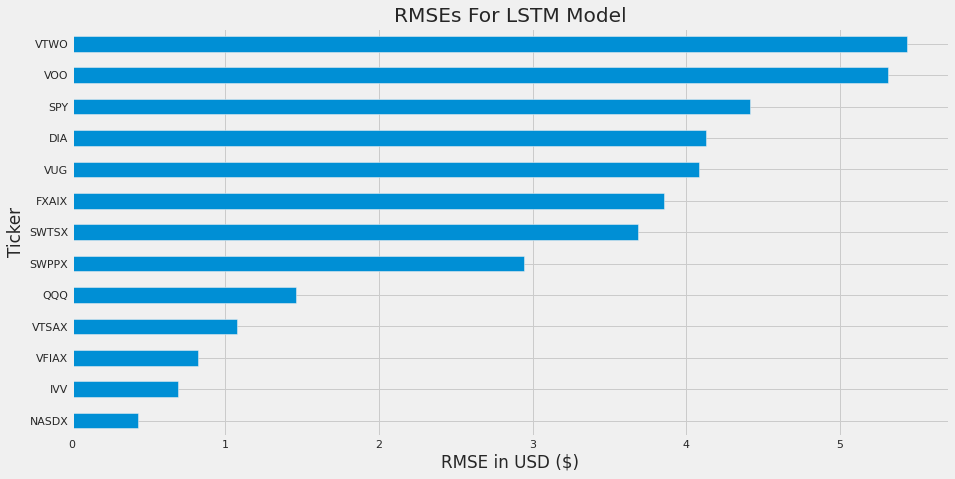

In [168]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('RMSEs For LSTM Model')
ax.set_ylabel('Ticker')
ax.set_xlabel('RMSE in USD ($)')
lstm_rmses_sorted.plot.barh(ax=ax);

### Visualizing ROIs

In [169]:
rois_df = rois_df.T

In [170]:
rois_df.index = ['NASDX','IVV','VFIAX','VTSAX','QQQ','SWPPX','SWTSX','FXAIX','VUG','DIA','SPY','VOO','VTWO']
rois_df.columns = ['ROI']

In [171]:
sorted_roi = rois_df['ROI'].sort_values(ascending=True)

In [172]:
sorted_roi

DIA      0.185695
NASDX    0.267214
VUG      0.293362
QQQ      0.318488
IVV      0.332980
VOO      0.356532
SWPPX    0.368498
FXAIX    0.385973
VFIAX    0.400738
VTSAX    0.421071
SPY      0.424128
SWTSX    0.508993
VTWO     4.694433
Name: ROI, dtype: float64

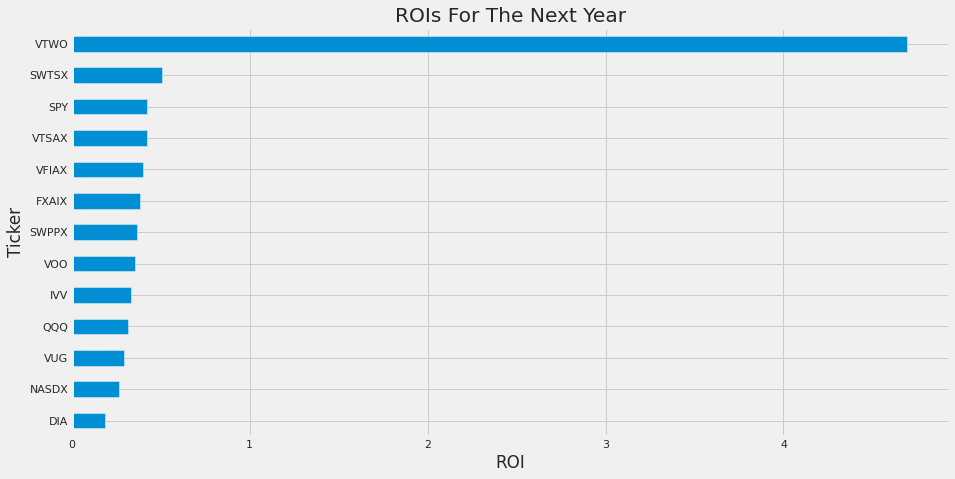

In [173]:
fig, ax = plt.subplots(figsize=(14,7))
sorted_roi.plot.barh(ax=ax)
ax.set_title('ROIs For The Next Year')
ax.set_xlabel('ROI')
ax.set_ylabel('Ticker');

### Conclusion
The graph shows us the the ROIs of the close price for each fund over the next year. Based on the ROIs, I will recommend the top 3 funds worth purchasing are VTWO, SWTSX, and SPY.